# Import Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import Data


### Distance matrix (50 nodes)

In [21]:
# Distance matrix 50 node
df_distance = pd.read_excel(r'C:\rl-meta-test\src\Source\VRP_50_node.xlsx', sheet_name="Sheet1")
distance = df_distance.iloc[:,1:].to_numpy()
kwargs = {"distance": distance}


In [22]:
df_distance

,Distance (Km.),Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,...,Node41,Node42,Node43,Node44,Node45,Node46,Node47,Node48,Node49,Node50
0,Node1,9999999.000,172.963,249.528,543.217,633.137,5.087,6.785,8.470,9.094,...,239.836,245.325,251.716,241.595,241.377,245.434,243.964,244.006,249.486,260.630
1,Node2,170.883,9999999.000,74.440,368.129,458.049,167.065,165.074,162.802,162.410,...,64.748,70.238,76.628,66.507,66.289,70.346,68.876,68.918,74.398,85.542
2,Node3,246.196,73.054,9999999.000,296.003,385.923,242.378,240.387,238.114,237.723,...,10.725,9.323,15.782,8.061,7.867,6.320,4.851,4.966,2.272,13.415
3,Node4,546.935,373.793,300.739,9999999.000,89.919,543.117,541.126,538.853,538.462,...,311.464,310.062,316.521,308.800,308.606,307.059,305.589,305.705,300.726,291.340
4,Node5,642.256,469.114,396.060,101.449,9999999.000,638.438,636.447,634.175,633.783,...,406.785,405.383,411.842,404.121,403.928,402.381,400.911,401.026,396.048,386.661
5,Node6,3.818,170.208,246.773,540.462,630.382,9999999.000,4.030,5.715,6.339,...,237.081,242.570,248.961,238.840,238.621,242.679,241.209,241.251,246.731,257.874
6,Node7,7.046,167.468,244.032,537.721,627.641,3.228,9999999.000,3.000,3.598,...,234.340,239.829,246.220,236.099,235.881,239.938,238.468,238.510,243.990,255.134
7,Node8,8.475,165.910,242.474,536.164,626.083,4.657,2.667,9999999.000,2.907,...,232.782,238.272,244.662,234.541,234.323,238.381,236.911,236.953,242.432,253.576
8,Node9,10.016,163.937,240.501,534.190,624.110,6.198,4.207,1.935,9999999.000,...,230.809,236.298,242.689,232.568,232.350,236.407,234.937,234.979,240.459,251.603
9,Node10,9.870,163.791,240.355,534.045,623.964,6.052,4.062,1.789,1.398,...,230.663,236.153,242.543,232.422,232.204,236.261,234.792,234.833,240.313,251.457


In [24]:
distance.shape

(50, 50)

### Distance matrix (8 nodes)

In [ ]:
# Distance matrix
distance = np.array(
    [
        [0, 0.664, 1.035, 1.789, 4.854, 7.586, 11.425, 11.871],
        [4.857, 0, 0.852, 1.606, 4.671, 7.403, 11.242, 11.688],
        [4.004, 4.23, 0, 0.753, 3.818, 6.55, 10.389, 10.835],
        [5.857, 6.083, 6.454, 0, 3.064, 5.796, 9.635, 10.081],
        [7.267, 7.493, 7.864, 4.066, 0, 2.934, 6.698, 7.144],
        [10.704, 10.93, 11.301, 7.503, 3.68, 0, 5.619, 6.065],
        [13.475, 13.701, 14.072, 10.274, 6.451, 5.409, 0, 0.943],
        [15.079, 15.305, 15.676, 11.878, 8.055, 7.013, 1.603, 0],
    ]
)
kwargs = {"distance": distance}

# Differential Evolutional Algorithm Parameters

In [12]:
dimensions = len(distance) - 1
maxiters = 1000
n_pop = 100
bounds = np.array([[0, 1]] * dimensions)
Mutation_rate = np.array([0.9, 0.5])
Crossover_rate = np.array([0.5, 0.1])


# Differential Evolutional Algorithm


In [13]:
def differential_evolution(
    objective_func,
    bounds,
    population_size=n_pop,
    max_generations=maxiters,
    Mutation_rate=Mutation_rate,
    Crossover_rate=Crossover_rate,
    **kwargs,
):
    # Initialize population
    population = np.random.uniform(
        bounds[:, 0], bounds[:, 1], (population_size, len(bounds))
    )
    global_solution = np.array([])
    Upperbound_Mutation = Mutation_rate[1]
    Lowerbound_Mutation = Mutation_rate[0]
    Upperbound_Crossover_rate = Crossover_rate[1]
    Lowerbound_Crossover_rate = Crossover_rate[0]
    F = Mutation_rate[0]
    CR = Crossover_rate[0]
    for generation in range(max_generations):
        # print(f'Iteration {generation}')
        current_cost = np.array([])
        F += (Upperbound_Mutation - Lowerbound_Mutation) / max_generations
        CR += (Upperbound_Crossover_rate - Lowerbound_Crossover_rate) / max_generations
        for i in range(population_size):
            # Mutation
            indices = [idx for idx in range(population_size) if idx != i]
            a, b, c = population[np.random.choice(indices, 3, replace=False)]
            mutant = population[i] + F * (b - c)

            # Crossover
            crossover_prob = np.random.rand(len(bounds))
            trial = np.where(crossover_prob < CR, mutant, population[i])

            # Selection
            fitness_trial = objective_func(trial, **kwargs)
            fitness_current = objective_func(population[i], **kwargs)

            if fitness_trial < fitness_current:
                population[i] = trial
                current_cost = np.insert(current_cost, len(current_cost), fitness_trial)
            else:
                current_cost = np.insert(
                    current_cost, len(current_cost), fitness_current
                )
            #print(f"population {i}")
            #print(f"current_cost{current_cost}")
            #print("---------" * 30)
        best_index_plot = current_cost[np.argmin(current_cost)]
        global_solution = np.insert(
            global_solution, len(global_solution), best_index_plot
        )

    # Find the best solution
    best_index = np.argmin(
        [objective_func(individual, **kwargs) for individual in population]
    )
    best_solution = population[best_index]

    return best_solution, global_solution

# Objective Function Evolution


In [14]:
def objective_func(x, **kwargs):
    """Decoding of each particles for obtaining routing solutions by argsort()"""
    seq = x.argsort() + 1
    """Calculate objective function for obtaining objective value of each particle"""
    j = f_per_particle(seq, **kwargs)
    return np.array(j)


def f_per_particle(m, **kwargs):
    X = m  # Sequence
    obj_val = preserving_strategy(X, **kwargs)  # Call Preserving strategy.
    return obj_val


def preserving_strategy(X, **kwargs):
    # distance matrix
    distance = kwargs["distance"]
    # total distance starts from zero km.
    total_distance = 0
    # Vehicle travel from depot to customer i
    total_distance += distance[0][X[0]]
    # Total distance of routing solution
    for i in range(len(X) - 1):
        total_distance += distance[X[i]][X[i + 1]]
    # Vehicle returns to depot
    total_distance += distance[X[-1]][0]
    # Return total distance (km.) that vehicle traveled
    return total_distance

# Finding Solution


In [15]:
start_algorithm = time.time()
best_solution, global_solution_plot = differential_evolution(
    objective_func,
    bounds=bounds,
    population_size=n_pop,
    max_generations=maxiters,
    Mutation_rate=Mutation_rate,
    Crossover_rate=Crossover_rate,
    **kwargs,
)
End_algorithm = time.time()
run_algorithm = End_algorithm - start_algorithm

# Solution


In [16]:
best_solution

array([-3.00378388e+02,  2.38605377e+01, -3.83103359e+00, -3.68560550e+00,
        3.40796534e+03,  1.00193985e+03,  2.85133846e+03,  1.05741746e+03,
        1.15212963e+03, -1.23586146e+03, -3.08160694e+02, -4.60457509e+02,
        7.46535449e+02,  7.73608788e+02,  3.98289668e+02,  2.94063296e+02,
        1.56991664e+02,  1.73127487e+02,  1.21345028e+02,  1.00617689e+02,
        7.24475352e+01,  9.82415115e+00, -2.30637382e+01,  1.51282841e+01,
       -3.55180965e+01, -1.25583905e+02,  6.16963826e+00, -5.61453251e+01,
        5.27927592e+00,  6.79392660e+01,  5.72054331e+00, -1.27689579e+02,
       -1.73200555e+02,  8.07744720e+00, -1.57271531e+01, -6.96725019e+01,
       -9.36409968e+01,  5.88500907e+01, -1.52378819e+01,  3.59695002e+01,
        5.61327709e+01, -9.88407747e-02, -7.05122259e+00, -8.37091236e+01,
       -7.15618763e+01, -9.13231018e+01,  3.53889578e+01,  1.68300337e+01,
       -2.15215045e+00])

In [17]:
routing = best_solution.argsort() + 1
routing = np.insert(routing, len(routing), 0)
routing = np.insert(routing, 0, 0)
print(f" Routing: {routing}")

 Routing: [ 0 10 12 11  1 33 32 26 37 46 44 45 36 28 25 23 35 39 43  3  4 49 42 29
 31 27 34 22 24 48  2 47 40 41 38 30 21 20 19 17 18 16 15 13 14  6  8  9
  7  5  0]


In [18]:
print(f" Total distance {preserving_strategy(routing, **kwargs)} KM.")

 Total distance 20001624.172 KM.


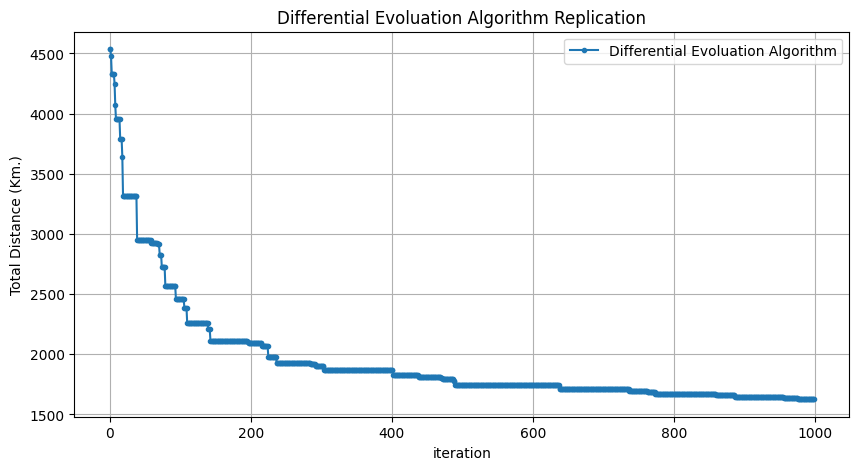

In [19]:
Replication = [i for i in range(len(global_solution_plot))]
y1 = global_solution_plot.tolist()
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(Replication, y1, marker=".", label="Differential Evoluation Algorithm")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title="Differential Evoluation Algorithm Replication",
)
ax.grid()
ax.legend()
plt.show()